## Imports and Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme()

## Data Loading

In [3]:
df_train = pd.read_csv("train.csv", index_col=0)
df_test = pd.read_csv("test.csv", index_col=0)
df_train.index.name = None
df_test.index.name = None

In [4]:
df_train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [5]:
df_test.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [8]:
df_train.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [9]:
df_test.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64

Fortunately, there are no missing values, so there's no imputation required.

## Data Analysis

We'll start by a simple description of the data

In [6]:
df_train.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [11]:
df_train["Sex"].value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

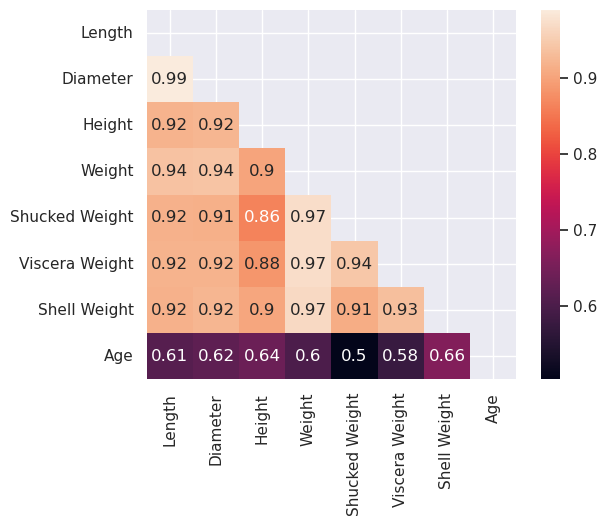

In [38]:
aux = df_train.corr(numeric_only=True)
mask = np.triu(np.ones_like(aux, dtype=bool))
sns.heatmap(aux, mask=mask, square=True, annot=True);

The features are very correlated among themselves, but not with the target variable.

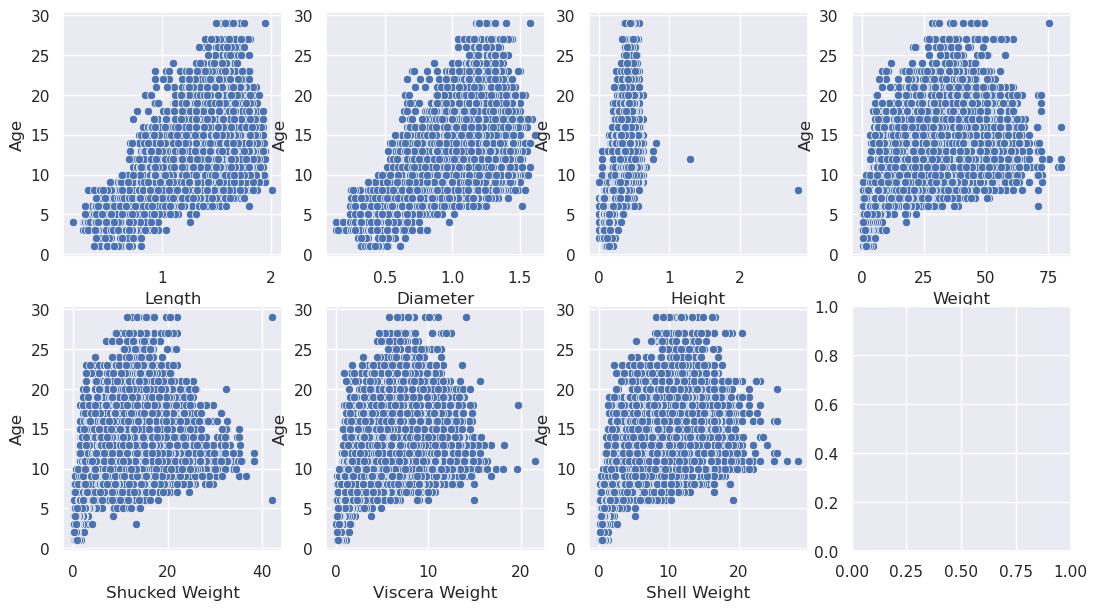

In [68]:
columns = df_train.columns[1:-1]
fig, axs = plt.subplots(2, 4, figsize=(13,7))
for i in range(len(columns)):
    x_cord = i//4
    y_cord = i % 4
    ax = axs[x_cord][y_cord]
    sns.scatterplot(data=df_train, x=columns[i], y="Age", ax=ax)

In [70]:
df_train[ df_train["Height"] > 1 ]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
4704,M,1.7625,1.4125,1.2875,62.652395,31.397071,11.637470,14.514944,12
19023,F,1.2375,0.9500,2.8250,16.839603,9.412034,3.288542,3.784658,8
55879,I,1.1375,0.8875,2.8250,16.839603,9.412034,4.068153,3.784658,8
